# Разведочный анализ данных (exploratory data analysis, EDA)

Задачи, которые ставятся перед аналитиками, достаточно разнообразны. Однако всё начинается с данных. 

В этом курсе мы не будем касаться бизнес-составляющей анализа данных, но при этом нужно понимать, что данные не берутся "из воздуха". Как и задачи, связанные с ними. В книге [Билла Фрэнкса](https://play.google.com/store/books/details/%D0%91_%D0%A4%D1%80%D1%8D%D0%BD%D0%BA%D1%81_%D0%A0%D0%B5%D0%B2%D0%BE%D0%BB%D1%8E%D1%86%D0%B8%D1%8F_%D0%B2_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B5_%D0%9A%D0%B0%D0%BA_%D0%B2_%D1%8D%D0%BF%D0%BE%D1%85%D1%83_Big_Dat?id=yPvkDQAAQBAJ) об операционной аналитике автор акцентирует внимание на том, что непродуманные инвестиции в сбор и хранение данных по принципу "а вдруг потом пригодятся" зачастую себя не оправдывают. Только после того, как поставлена определённая цель, можно начинать процесс сбора (или, возможно, покупки) и анализа данных.

К сожалению, на практике данные в "сыром" виде обычно малопригодны для анализа. Процесс подготовки и очистки данных (препроцессинг, англ. data preparation, pre-processing, data cleaning) может быть **весьма трудоёмким** и по времени занимать больше, чем собственно построение и валидация моделей на основе данных. Выделим некоторые составляющие этого процесса:

- data specification (понимание данных)
- data editing (редактирование данных, исправление ошибок --- ручное, автоматическое или их комбинация)
- работа с пропущенными значениями
- нормализация
- feature extraction and selection (создание и отбор признаков)

В результате получаем данные в удобном для анализа формате, как правило, табличном. Таблица (или датафрейм) имеет структуру "объекты-признаки": строки соответствуют отдельным сущностям (объектам, примерам, экземплярам), а столбцы --- атрибутам этих сущностей (признакам).

In [ ]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); # более красивый внешний вид графиков по умолчанию

In [ ]:
! unzip cardio_train.csv.zip

Archive:  cardio_train.csv.zip
  inflating: cardio_train.csv        


In [ ]:
# df = pd.read_csv('../input/cardio_train.csv', sep=';')
df = pd.read_csv('cardio_train.csv', sep=';')

In [ ]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


# Задания для самостоятельной работы

1. Определите количество мужчин и женщин среди испытуемых. Обратите внимание, что способ кодирования переменной gender мы не знаем. Воспользуемся медицинским фактом, а именно: мужчины в среднем выше женщин.

In [ ]:
if df.groupby('gender')['height'].mean()[1] > df.groupby('gender')['height'].mean()[2]:
    print('Количество мужчин:', df['gender'].value_counts()[1], '(закодировано цифрой 1).', 
          'Количество женщин:', df['gender'].value_counts()[2], '(закодировано цифрой 2).')
else:
    print('Количество мужчин:', df['gender'].value_counts()[2], '(закодировано цифрой 2).',
          'Количество женщин:', df['gender'].value_counts()[1], '(закодировано цифрой 1).')
    

Количество мужчин: 24470 (закодировано цифрой 2). Количество женщин: 45530 (закодировано цифрой 1).


In [ ]:
m = df['gender'].value_counts()[2]
m

24470

In [ ]:
f = df['gender'].value_counts()[1]
f

45530

2. Верно ли, что мужчины более склонны к употреблению алкоголя, чем женщины?

In [ ]:
f_m_alco = pd.crosstab(df['gender'], df['alco'])
f_m_alco

alco,0,1
gender,,
1,44369,1161
2,21867,2603


In [ ]:
f_alco = f_m_alco.loc[1][1]/df['gender'].value_counts().loc[1]
m_alco = f_m_alco.loc[2][1]/df['gender'].value_counts().loc[2]
if f_alco < m_alco:
    print('Верно, что мужчины более склонны к употреблению алкоголя, чем женщины')
else:
    print('Не верно, что мужчины более склонны к употреблению алкоголя, чем женщины')

Верно, что мужчины более склонны к употреблению алкоголя, чем женщины


In [ ]:
f_alco = df[df['gender'] == 1]['alco'].value_counts(normalize=True)[1]
f_alco

0.02549967054689216

In [ ]:
m_alco = df[df['gender'] == 2]['alco'].value_counts(normalize=True).loc[1]
m_alco

0.10637515324887617

In [ ]:
if f_alco < m_alco:
    print('Верно, что мужчины более склонны к употреблению алкоголя, чем женщины')
else:
    print('Не верно, что мужчины более склонны к употреблению алкоголя, чем женщины')

Верно, что мужчины более склонны к употреблению алкоголя, чем женщины


3. Каково различие между процентами курящих мужчин и женщин?

In [ ]:
df[df['gender'] == 2]['smoke'].value_counts(normalize=True)

0    0.78112
1    0.21888
Name: smoke, dtype: float64

In [ ]:
f_smoke = df[df['gender'] == 1]['smoke'].value_counts(normalize=True).loc[1]
f_smoke

0.017856358444981332

In [ ]:
m_smoke = df[df['gender'] == 2]['smoke'].value_counts(normalize=True).loc[1]
m_smoke

0.21888026154474868

In [ ]:
print('Pазличие между процентами курящих мужчин и женщин:', str(round(abs(m_smoke - f_smoke)*100, 1))+'%')

Pазличие между процентами курящих мужчин и женщин: 20.1%


4. Какова разница между средними значениями возраста для курящих и некурящих?


In [ ]:
df[df['smoke'] == 1]['age'].mean()/365

52.30366281251596

In [ ]:
df[df['smoke'] == 0]['age'].mean()/365

53.43945405493917

Разница между средними значениями возраста для курящих и некурящих: 1 год.


5. Создайте новый признак --- BMI (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах. Считается, что нормальные значения ИМТ составляют от 18.5 до 25. Выберите верные утверждения:

    (a) Средний ИМТ находится в диапазоне нормальных значений ИМТ.

    (b) ИМТ для женщин в среднем выше, чем для мужчин.

    (c) У здоровых людей в среднем более высокий ИМТ, чем у людей с ССЗ.

    (d) Для здоровых непьющих мужчин ИМТ ближе к норме, чем для здоровых непьющих женщин


In [ ]:
df['bmi'] = round(df['weight'] / ((df['height']/100)**2), 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [ ]:
df['bmi'].mean()

27.55531142857143

In [ ]:
f_bmi = df[df['gender'] == 1]['bmi'].mean()
f_bmi

27.985772018449378

In [ ]:
m_bmi = df[df['gender'] == 2]['bmi'].mean()
m_bmi

26.75437678790356

In [ ]:
cardio_0_bmi = df[df['cardio'] == 0]['bmi'].mean()
cardio_0_bmi

26.546751948830703

In [ ]:
cardio_1_bmi = df[df['cardio'] == 1]['bmi'].mean()
cardio_1_bmi

28.56508190628663

In [ ]:
f00_bmi = df[(df['gender'] == 1) & (df['cardio'] == 0) & (df['alco'] == 0)]['bmi'].mean()
f00_bmi

26.843260791689058

In [ ]:
m00_bmi = df[(df['gender'] == 2) & (df['cardio'] == 0) & (df['alco'] == 0)]['bmi'].mean()
m00_bmi

25.872804242649796

Верные утверждения:

    (b) ИМТ для женщин в среднем выше, чем для мужчин.

    (d) Для здоровых непьющих мужчин ИМТ ближе к норме, чем для здоровых непьющих женщин


6. Удалите пациентов, у которых диастолическое давление выше систолического. Какой процент от общего количества пациентов они составляли?

In [ ]:
ap_df = df.drop(df[df['ap_lo'] < df['ap_hi']].index)
print(str(round((ap_df.shape[0] / df.shape[0])*100, 1))+'%')

1.8%


7. На сайте Европейского общества кардиологов представлена шкала [SCORE](https://www.escardio.org/static_file/Escardio/Subspecialty/EACPR/Documents/score-charts.pdf). Она используется для расчёта риска смерти от сердечно-сосудистых заболеваний в ближайшие 10 лет. 

    Рассмотрим верхний правый прямоугольник, который показывает подмножество курящих мужчин в возрасте от 60 до 65 лет (значения по вертикальной оси на рисунке представляют верхнюю границу).

    Мы видим значение 9 в левом нижнем углу прямоугольника и 47 в правом верхнем углу. Это означает, что для людей этой возрастной группы с систолическим давлением менее 120 и низким уровнем холестерина риск сердечно-сосудистых заболеваний оценивается примерно в 5 раз ниже, чем для людей с давлением в интервале [160, 180] и высоким уровнем холестерина.

    Вычислите аналогичное соотношение для наших данных.

In [ ]:
cardio_1_65_160_3 = df[(df['age']/365 > 60) & (df['gender'] == 2) & (df['smoke'] == 1) & (df['ap_hi'] > 160) & (df['ap_hi'] < 180) & (df['cholesterol'] == 3) & (df['cardio'] == 1)].shape[0]
cardio_1_65_160_3

3

In [ ]:
cardio_65_160_3 = df[(df['age']/365 > 60) & (df['gender'] == 2) & (df['smoke'] == 1) & (df['ap_hi'] > 160) & (df['ap_hi'] < 180) & (df['cholesterol'] == 3)].shape[0]
cardio_65_160_3

3

In [ ]:
risk_cardio_65_160_3 = (cardio_1_65_160_3 / cardio_65_160_3)*100
risk_cardio_65_160_3

100.0

In [ ]:
cardio_1_65_120_1 = df[(df['age']/365 > 60) & (df['gender'] == 2) & (df['smoke'] == 1) & (df['ap_hi'] < 120) & (df['cholesterol'] == 1) & (df['cardio'] == 1)].shape[0]
cardio_1_65_120_1

15

In [ ]:
cardio_65_120_1 = df[(df['age']/365 > 60) & (df['gender'] == 2) & (df['smoke'] == 1) & (df['ap_hi'] < 120) & (df['cholesterol'] == 1)].shape[0]
cardio_65_120_1

54

In [ ]:
risk_cardio_65_120_1 = (cardio_1_65_120_1/cardio_65_120_1)*100
risk_cardio_65_120_1

27.77777777777778

In [ ]:
risk_cardio_65_160_3/risk_cardio_65_120_1

3.6


    Для наших данных:
    
    Для курящих мужчин в возрасте от 60 лет с систолическим давлением менее 120 и низким уровнем холестерина риск сердечно-сосудистых заболеваний оценивается примерно в 3,5 раз ниже, чем для людей с давлением в интервале [160, 180] и высоким уровнем холестерина.

8. Визуализируйте распределение уровня холестерина для различных возрастных категорий.

In [ ]:
df['age'] = (df['age'] / 365).round()

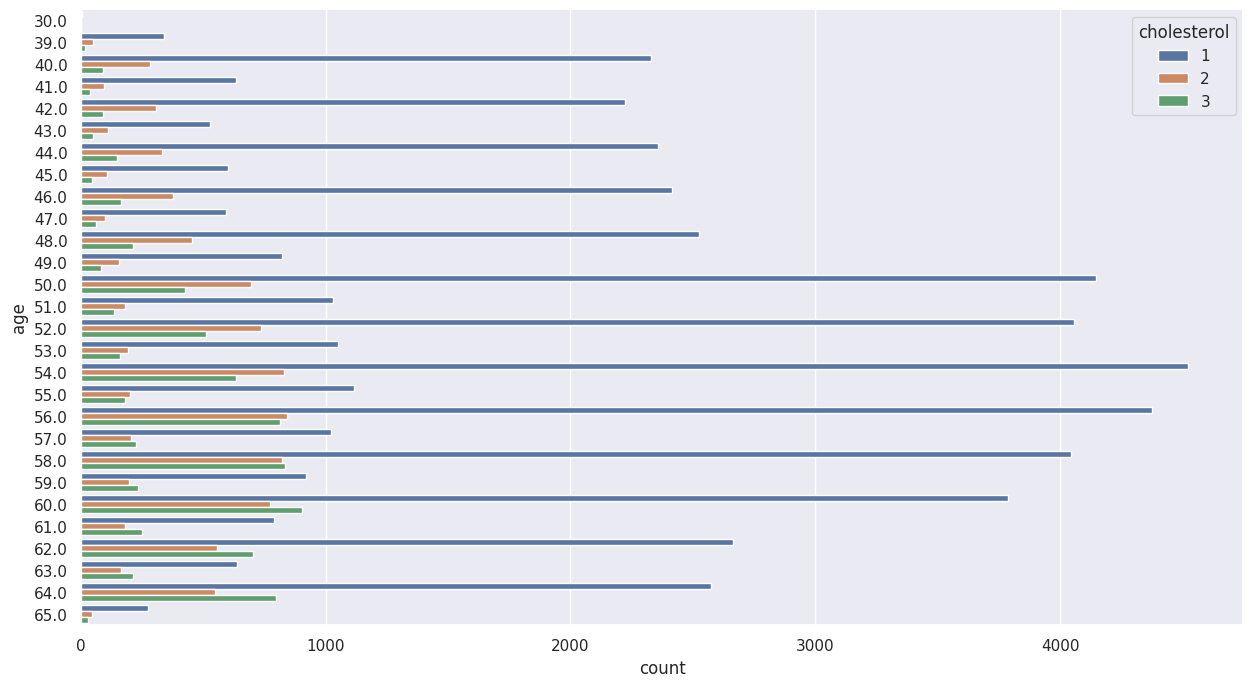

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(y='age', hue='cholesterol', data=df);

9. Как распределена переменная BMI? Есть ли выбросы 

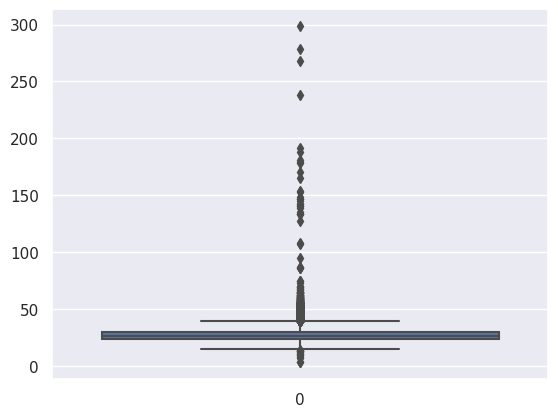

In [ ]:
sns.boxplot(df['bmi']);

Нормальное распределение. Выбросы есть.

10. Как соотносятся ИМТ и наличие ССЗ? Придумайте подходящую визуализацию.

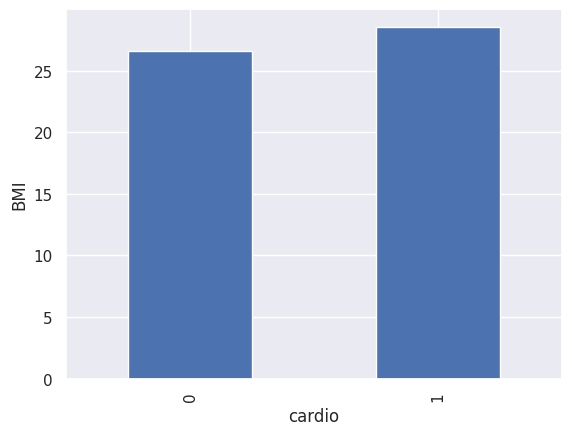

In [ ]:
df.groupby('cardio')['bmi'].mean().plot(kind='bar') 
plt.ylabel('BMI')
plt.show();